# Exploratory Data Analysis - Sports 

### Name: K Siddartha D Shetty
 
Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characterstics,often with help of data visualization methods.The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set.

In this task i will perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. The data contains information of all matches played between ipl season 2008 till ipl season 2019.

As a sport's analyst my job is to find out the most successful team,find out the most successful players,factors contributing to win or loss of a team etc....

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                        #importing all the necessary libraries

UsageError: unrecognized arguments: #importing all the necessary libraries


In [2]:
ipl_data = pd.read_csv('matches.csv')

In [3]:
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


### data cleaning

Here it is important to remove unecessary data and retain only the important ones. We can take the help of heat maps to visualize the missing data.

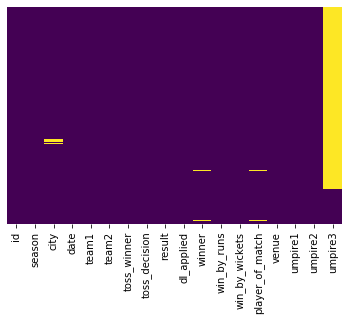

In [5]:
sns.heatmap(ipl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We observe that there are lot of missing data in umpire3 column.That the reason it would be wise to remove this column using an inbuilt function drop.

In [6]:
ipl_data.drop('umpire3',axis=1,inplace=True)

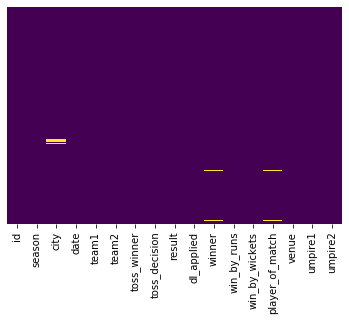

In [7]:
sns.heatmap(ipl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

After removing the umpire3 column we observe that other columns don't have much missing values thus we can continue our analysis from the modified dataset

### Most successful teams

Now let us start our analysis by first finding which is the most successful team in ipl history.

In [8]:
team_performance_seasonwise = ipl_data.groupby('season')['winner'].value_counts()
team_performance_seasonwise

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [9]:
d_victory={}
for i, v in team_performance_seasonwise.iteritems():
    if i[1] in d_victory:
        d_victory[i[1]]+=v
    else:
        d_victory[i[1]]=v
print(d_victory)

{'Rajasthan Royals': 75, 'Kings XI Punjab': 82, 'Chennai Super Kings': 100, 'Delhi Daredevils': 67, 'Mumbai Indians': 109, 'Kolkata Knight Riders': 92, 'Royal Challengers Bangalore': 84, 'Deccan Chargers': 29, 'Kochi Tuskers Kerala': 6, 'Pune Warriors': 12, 'Sunrisers Hyderabad': 58, 'Gujarat Lions': 13, 'Rising Pune Supergiants': 5, 'Rising Pune Supergiant': 10, 'Delhi Capitals': 10}


Now there are few important corrections to be performed.

1.The team Delhi Daredevils have been renamed to delhi capitals thus it is important to change the name of the team in data set.

2.In the data name of Rising Pune Supergiants team has been mentioned different in the different seasons so it would be advisable to rename it to a common name.

In [10]:
ipl_data.replace('Delhi Daredevils','Delhi Capitals',regex=True,inplace=True)

In [11]:
ipl_data.replace('Rising Pune Supergiants','Rising Pune Supergiant',regex=True,inplace=True)

In [12]:
team_performance_seasonwise = ipl_data.groupby('season')['winner'].value_counts()
team_performance_seasonwise

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [13]:
d_victory={}
for i, v in team_performance_seasonwise.iteritems():
    if i[1] in d_victory:
        d_victory[i[1]]+=v
    else:
        d_victory[i[1]]=v
print(d_victory)                  #number of matches won by each team

{'Rajasthan Royals': 75, 'Kings XI Punjab': 82, 'Chennai Super Kings': 100, 'Delhi Capitals': 77, 'Mumbai Indians': 109, 'Kolkata Knight Riders': 92, 'Royal Challengers Bangalore': 84, 'Deccan Chargers': 29, 'Kochi Tuskers Kerala': 6, 'Pune Warriors': 12, 'Sunrisers Hyderabad': 58, 'Gujarat Lions': 13, 'Rising Pune Supergiant': 15}


In [14]:
d_total={}
for i in ipl_data['team1']:
    if i in d_total:
        d_total[i]+=1
    else:
        d_total[i]=1
for i in ipl_data['team2']:
    if i in d_total:
        d_total[i]+=1
    else:
        d_total[i]=1 
print(d_total)                       #total number of matches played

{'Sunrisers Hyderabad': 108, 'Mumbai Indians': 187, 'Gujarat Lions': 30, 'Rising Pune Supergiant': 30, 'Royal Challengers Bangalore': 180, 'Kolkata Knight Riders': 178, 'Delhi Capitals': 177, 'Kings XI Punjab': 176, 'Chennai Super Kings': 164, 'Rajasthan Royals': 147, 'Deccan Chargers': 75, 'Kochi Tuskers Kerala': 14, 'Pune Warriors': 46}


I have considered "win percentage" of the teams as an criteria to decide the best team for my project.

The main reason is that consistency is very crucial paramter for a successful team and win percentage over matches played in all 12 seasons would tell how consistent the team is.It should also be noted that there are few teams which have not played all the seasons of ipl , so just by the number of matches won we can't decide the best team.

Now I have created a data frame and then recorded all the team's win percentages to analyse their performance.

In [15]:
win_perc_df = pd.DataFrame(columns=['team', 'win_percentage'])
for items in d_total:
    temp_df = pd.DataFrame({
        'team':[items],
        'win_percentage':[round(d_victory[items]/d_total[items]*100,2)]
    })
    win_perc_df = win_perc_df.append(temp_df, ignore_index=True)

In [16]:
win_perc_df

,team,win_percentage
0,Sunrisers Hyderabad,53.70
1,Mumbai Indians,58.29
2,Gujarat Lions,43.33
3,Rising Pune Supergiant,50.00
4,Royal Challengers Bangalore,46.67
5,Kolkata Knight Riders,51.69
6,Delhi Capitals,43.50
7,Kings XI Punjab,46.59
8,Chennai Super Kings,60.98
9,Rajasthan Royals,51.02


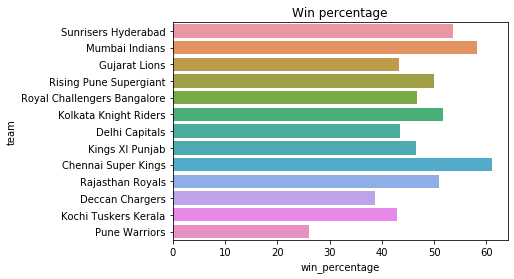

In [17]:
plt.title("Win percentage")
sns.barplot(x='win_percentage', y='team', data=win_perc_df);

Therefore the three mos't successful teams are:
##### Chennai Super Kings
##### Mumbai Indians
##### Sunrisers Hyderabad





### Most successful players

From the data available we have information about the man of the match award won by cricket players of each match.Now we will take the help of that data to identify the best players of this tournament.

In [18]:
max_player_of_match=ipl_data['player_of_match'].value_counts()

In [19]:
top_ten=max_player_of_match.head(10)

In [20]:
top_ten       # top 10 players

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

From the above analysis the most successful players are:
##### CH Gayle
##### AB de Villiers
##### MS Dhoni




### Important factors contributing to win or loss of a team

now we will consider various factors in a game and see whether they play an important role in win/loss of a team.

#### 1.Toss

Now let's see whether team winning a toss will have an advantage over the other team.

In [21]:
win_count = 0
total_count=0
for index, value in ipl_data.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1
    total_count+=1
        
print('percentage of team winning after winning the toss is {} %'.format(round((win_count/total_count)*100),2))

percentage of team winning after winning the toss is 52 %


From the above observation we see that chances of team winning after winning the toss is 52 % which means for a team winning or loosing the toss will not have greater effect on the final result.

#### 2.Batting First or fielding first

Now let's see whether batting first or fielding first will have any impact on the final result

In [22]:
won_batting_first=ipl_data[ipl_data['win_by_runs']>0].shape[0]
won_fielding_first=ipl_data.shape[0]-won_batting_first

percentage_of_team_batting_first_winning=(won_batting_first/ipl_data.shape[0])*100
print('percentage of team winning batting first is {} %'.format(round(percentage_of_team_batting_first_winning,2)))
print('percentage of team winning fielding first is {} %'.format(round(100-percentage_of_team_batting_first_winning,2)))

percentage of team winning batting first is 44.58 %
percentage of team winning fielding first is 55.42 %


Now from the above observation we can say that for the team fielding first there is a slight advantage compared to team batting first.

This can be understandable as Due factor plays a crucial role in cricket where team batting second get's an advantage over team batting first.

#### 3.Home Advantage

We know that in IPL teams play around 50% of their match in home conditions. For example kolkata knight riders play around 50% of their games in eden gardens in a season.

But it should also be known that in few seasons ipl matches were not conducted in india as they were shifted to other countries like UAE and South africa.Even few IPL teams had their home ground in stadiums present in other states.

So while doing the analysis I have tried my best to consider these factors. I have used replace function to make changes to the dataframe.I have analysed on selective stadiums but have covered majority of them.

In [23]:
ipl_data.replace('Bengaluru','Bangalore',regex=True,inplace=True)
ipl_data.replace('Visakhapatnam','Hyderabad',regex=True,inplace=True)
ipl_data.replace('Mohali','Chandigarh',regex=True,inplace=True)
ipl_data.replace('Dharamsala','Chandigarh',regex=True,inplace=True)
ipl_data.replace('Ahmedabad','Jaipur',regex=True,inplace=True)
ipl_data.replace('Raipur','Delhi',regex=True,inplace=True)
ipl_data.replace('Ranchi','Chennai',regex=True,inplace=True)
ipl_data.replace('Indore','Chandigarh',regex=True,inplace=True)
ipl_data.replace('Nagpur','Hyderabad',regex=True,inplace=True)
ipl_data.replace('Kanpur','Rajkot',regex=True,inplace=True)

In [24]:
venue=ipl_data['city'].value_counts()
d_venues={'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata','Delhi Capitals':'Delhi','Royal Challengers Bangalore':'Bangalore',
         'Sunrisers Hyderabad':'Hyderabad','Chennai Super Kings':'Chennai','Rajasthan Royals':'Jaipur','Kings XI Punjab':'Chandigarh',
         'Rising Pune Supergiant':'Pune','Gujarat Lions':'Rajkot','Kochi Tuskers Kerala':'Kochi','Deccan Chargers':'Hyderabad',
         'Pune Warriors':'Pune'}
venue.head()

Mumbai       101
Delhi         80
Hyderabad     80
Bangalore     80
Kolkata       77
Name: city, dtype: int64

In [25]:
win_count=0
no_of_matches_in_considered_venues=672
for index, value in ipl_data.iterrows():
    if value['winner'] in d_venues:
        if(d_venues[value['winner']]==value['city']):
            win_count += 1
        
print('Home advantage for team:{}%'.format(round(win_count/no_of_matches_in_considered_venues*100,2)))

Home advantage for team:51.34%


It can be noted that in IPL, home ground is not an important factor for win or loss of a team.